<a href="https://colab.research.google.com/github/anirudh217sharma/House_Prices_Advanced_Regression_Techniques/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=orange>**Kaggle Knowledge Comp1 : House Prices - Advanced Regression Techniques **</font>

In [28]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical computing
import numpy as np

# Import the matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Import the seaborn library for advanced visualizations
import seaborn as sns

# Import the scikit-learn library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# Import the scipy library for scientific computing
import scipy as sp

# Import the statsmodels library for statistical modeling
import statsmodels.api as sm

# Import the patsy library for building statistical models
import patsy

import plotly.express as px

# Interactive dataframe - a collab feature
from google.colab import data_table
data_table.enable_dataframe_formatter()
plt.style.use('seaborn-darkgrid')

# Auto ML Library
# Trying an autgluon model just as a benchmark without any preprocessing
# !pip install autogluon
# import autogluon as ag

<ipython-input-28-6a845c99d076>:36: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [2]:
# !pip uninstall autogluon.core
# !pip uninstall autogluon
# !pip install autogluon

In [3]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_dir = 'gdrive/MyDrive/Academics-UIUC/House Prices/house-prices-advanced-regression-techniques'
train = pd.read_csv(data_dir + '/train.csv')
test  = pd.read_csv(data_dir + '/test.csv')

In [5]:
print(f'Number of trainaing examples : {len(train)}')
print(f'Number of validation examples : {len(test)}')

Number of trainaing examples : 1460
Number of validation examples : 1459


EDA

In [6]:
print(f'The shape of the training dataset is : {train.shape}')
print(f'The shape of the test dataset is : {test.shape}')

The shape of the training dataset is : (1460, 81)
The shape of the test dataset is : (1459, 80)


In [7]:

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# Checking the Missing Value Percentage for each column
def missing_percentage(df):
  """
  Calculates the missing values percentage for each column in a pandas dataframe.

  Args:
      df: A pandas dataframe.

  Returns:
      A pandas Series containing the missing values percentage for each column.
  """

  missing_values = df.isna().sum()
  total_values = len(df)
  missing_percentages = (missing_values / total_values) * 100
  return pd.DataFrame(missing_percentages,columns=['Missing %'])

missing_df = missing_percentage(train)
missing_df = missing_df[missing_df['Missing %'] > 0]
missing_df

,Missing %
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [10]:
# There are columns with significantly high missing values which can defenitely be dropped such as
# MiscFeature, Alley, Fence. FirePlaceQu & Lot Percetage can be explored to see if any treatment is possible
# Other Columns can be imputed most likely

In [11]:
# Dropping the three columns
train = train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
missing_df = missing_percentage(train)
missing_df = missing_df[missing_df['Missing %'] > 0]
missing_df

,Missing %
LotFrontage,17.739726
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
FireplaceQu,47.260274


In [12]:
print(train['FireplaceQu'].unique()) # It's a categorical column with almost 50 % of missing values better to drop it as well
train = train.drop(['FireplaceQu'],axis=1)
missing_df = missing_percentage(train)
missing_df = missing_df[missing_df['Missing %'] > 0]
missing_df


[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


,Missing %
LotFrontage,17.739726
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
GarageType,5.547945


In [13]:
def print_column_types(df):
  """
  Prints which columns in a pandas dataframe are categorical and which are numerical.

  Args:
      df: A pandas dataframe.
  """

  categorical_cols = []
  numerical_cols = []

  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      numerical_cols.append(col)
    else:
      categorical_cols.append(col)

  print("Categorical columns:", len(categorical_cols))
  print("Numerical columns:", len(numerical_cols))

  return categorical_cols, numerical_cols

catCol, numCol = print_column_types(train)

Categorical columns: 38
Numerical columns: 38


In [14]:
# Getting the actual categorical/numerical columns which requires imputation dict()
imputation_dict = dict()

for col in missing_df.index:
  if col in catCol:
    imputation_dict[col] = 'Categorical'
  elif col in numCol:
    imputation_dict[col] = 'Numerical'

print(imputation_dict)
print(len(imputation_dict.keys()))
print(len(missing_df.index))

{'LotFrontage': 'Numerical', 'MasVnrType': 'Categorical', 'MasVnrArea': 'Numerical', 'BsmtQual': 'Categorical', 'BsmtCond': 'Categorical', 'BsmtExposure': 'Categorical', 'BsmtFinType1': 'Categorical', 'BsmtFinType2': 'Categorical', 'Electrical': 'Categorical', 'GarageType': 'Categorical', 'GarageYrBlt': 'Numerical', 'GarageFinish': 'Categorical', 'GarageQual': 'Categorical', 'GarageCond': 'Categorical'}
14
14


In [15]:
"""
Imputation method - using median for numerical columns & mode for Categorical columns

TODO-> Other methods can be tried later on to see how it affects the model performance

"""

def impute_missing_values(df, impute_dict):
  """
  Imputes missing values in a pandas dataframe using the provided dictionary.

  Args:
      df: A pandas dataframe.
      impute_dict: A dictionary with keys as column names and values as either
          "Categorical" or "Numerical".

  Returns:
      A pandas dataframe with imputed missing values.
  """

  for column, imputation_type in impute_dict.items():
    if imputation_type == "Categorical":
      df[column] = df[column].fillna(df[column].mode()[0])
    elif imputation_type == "Numerical":
      df[column] = df[column].fillna(df[column].median())
    else:
      raise ValueError(f"Invalid imputation type: {imputation_type}")

  return df

train_imputed = impute_missing_values(train.copy(), imputation_dict)
train_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
# Checking the Missing Dataframe again to see if the imputation worked as expected
missing_df = missing_percentage(train_imputed)
missing_df

,Missing %
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
...,...
MoSold,0.0
YrSold,0.0
SaleType,0.0
SaleCondition,0.0


In [17]:
# Dropping the id column as that doesn't add any value
train_imputed = train_imputed.drop(['Id'],axis=1)
numCol = numCol[1:]
print(numCol)
train_imputed

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
# Create a correlation matrix
correlation_matrix = train_imputed[numCol].corr()

# Create a heatmap using plotly express
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale="RdBu")

# Update the layout
fig.update_layout(
    title="Correlation Plot of Numerical Features",
    xaxis_title="Features",
    yaxis_title="Features",
)

# Show the plot
fig.show()

In [19]:
train_imputed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Lets Split the Categorical & numerical features so that we can dive deep into the Nature of the Categorical features & handle them appropriately

In [24]:
trainCat = train_imputed[catCol]
trainNum = train_imputed[numCol]

In [25]:
trainCat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


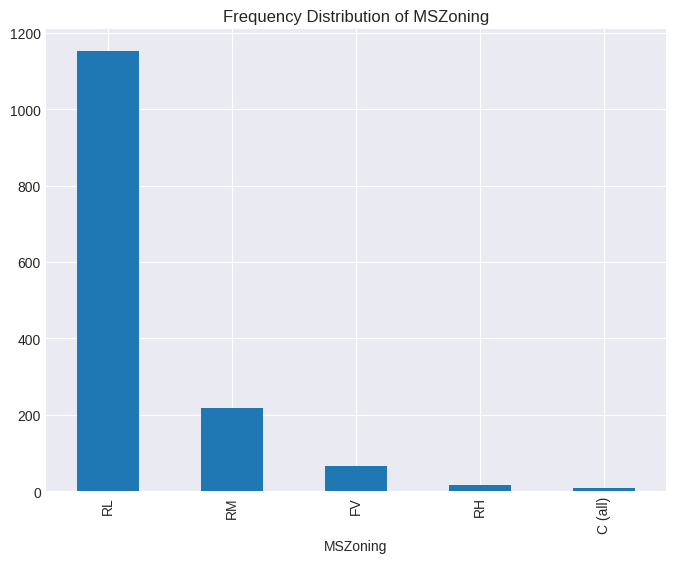

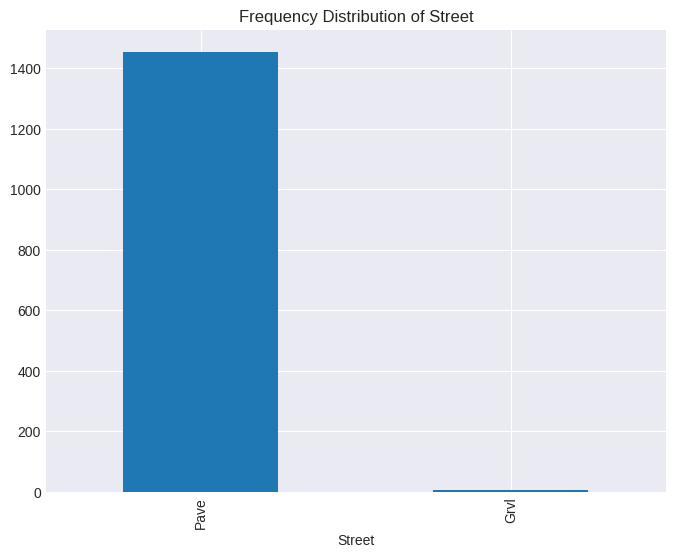

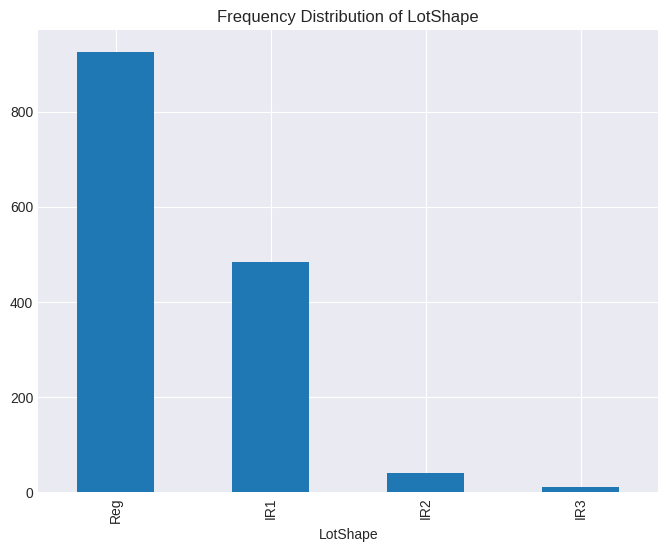

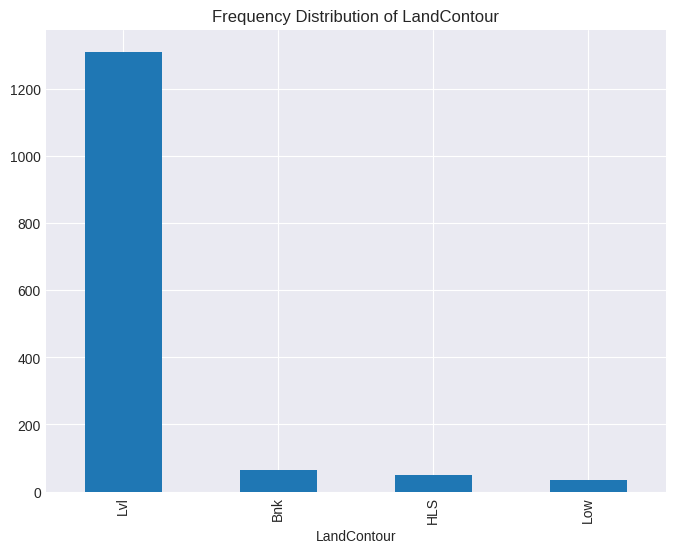

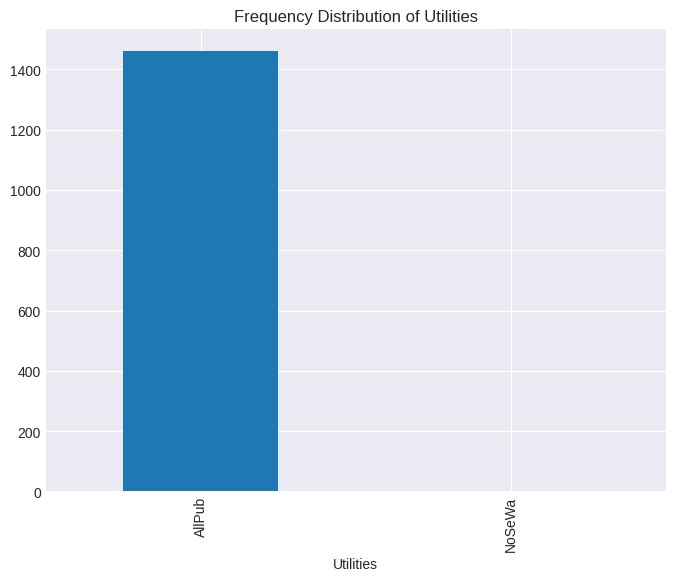

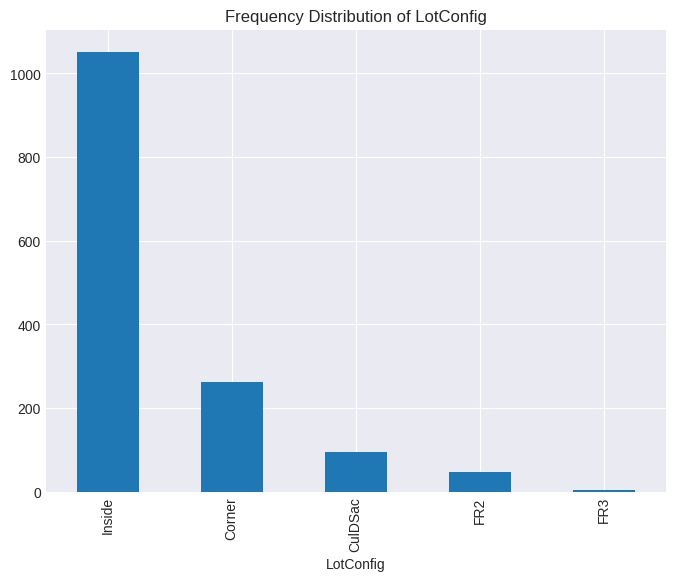

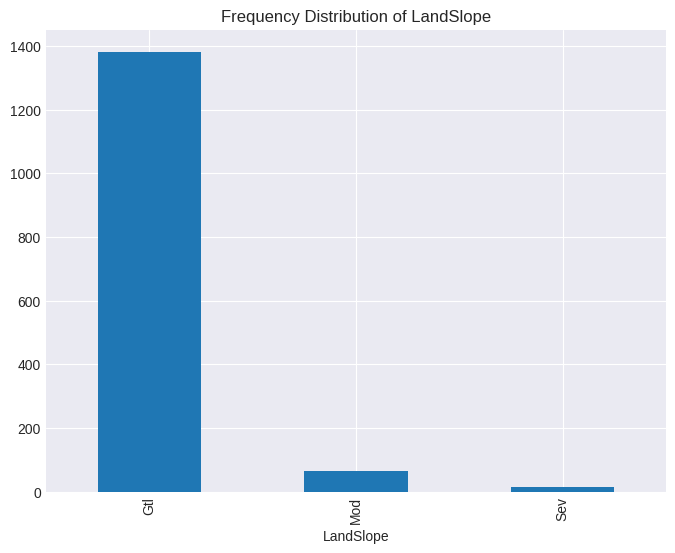

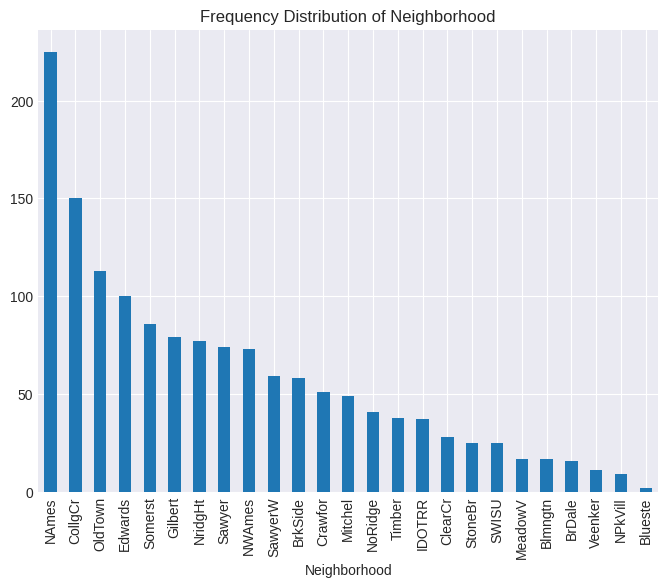

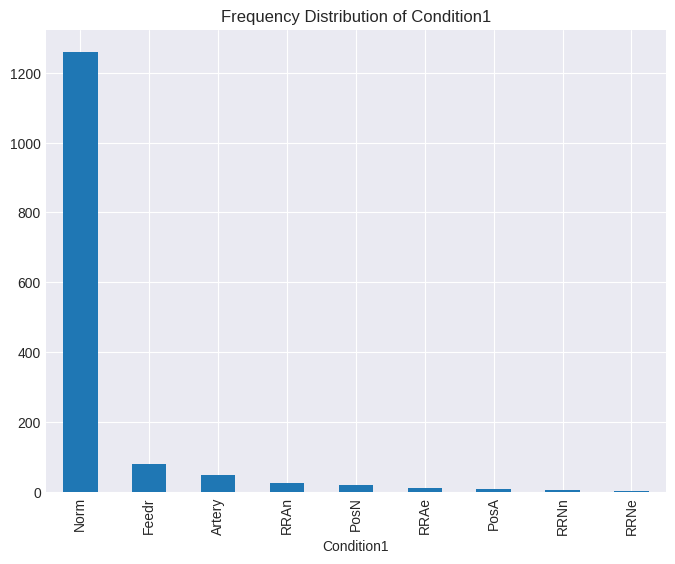

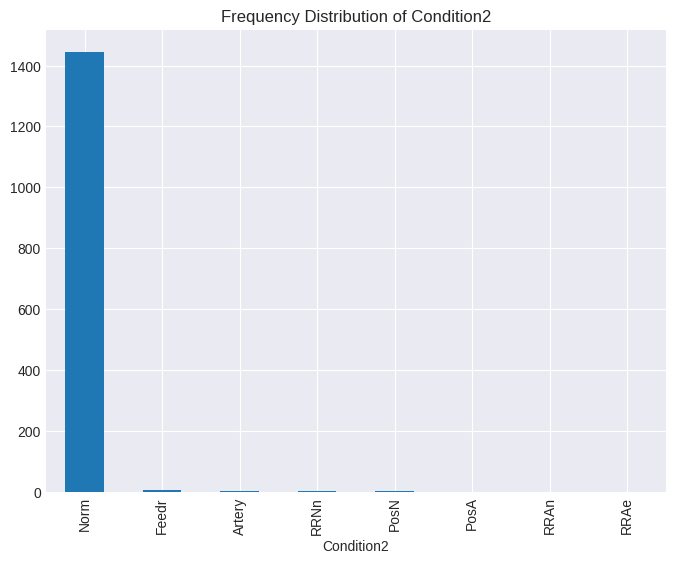

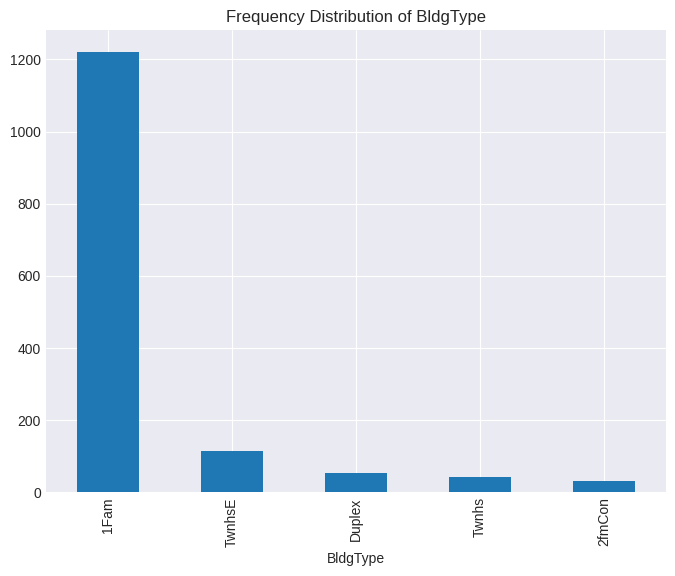

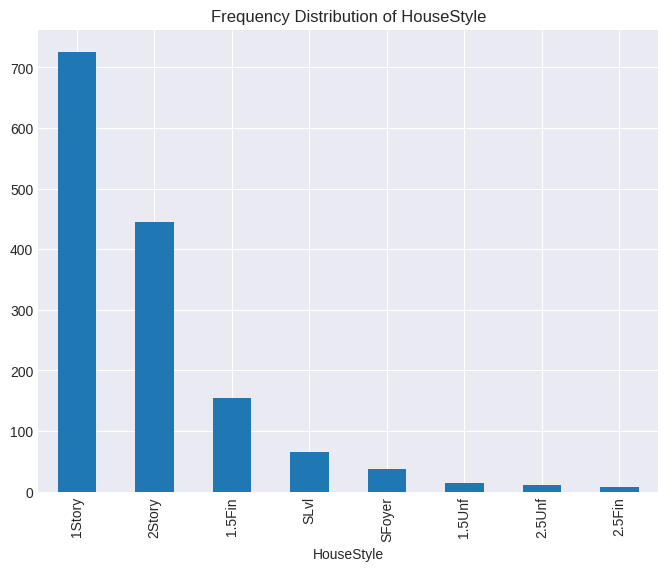

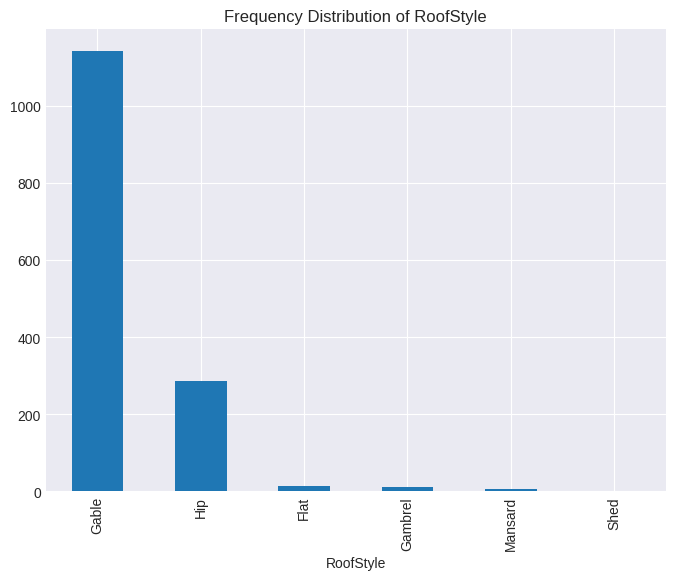

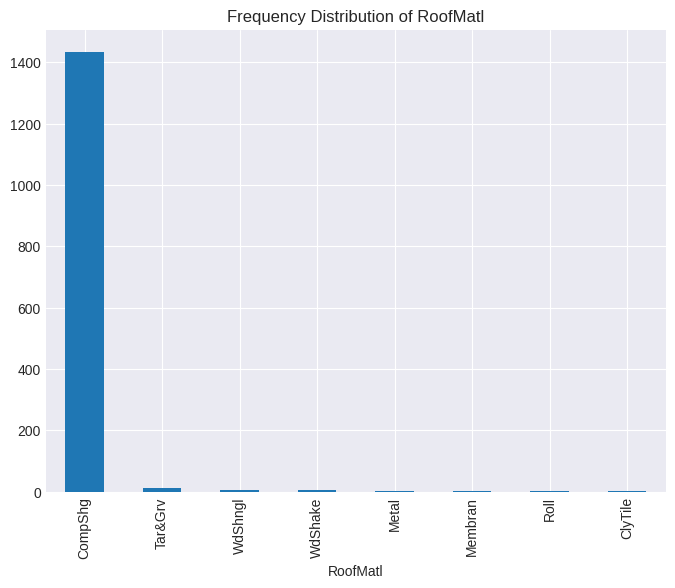

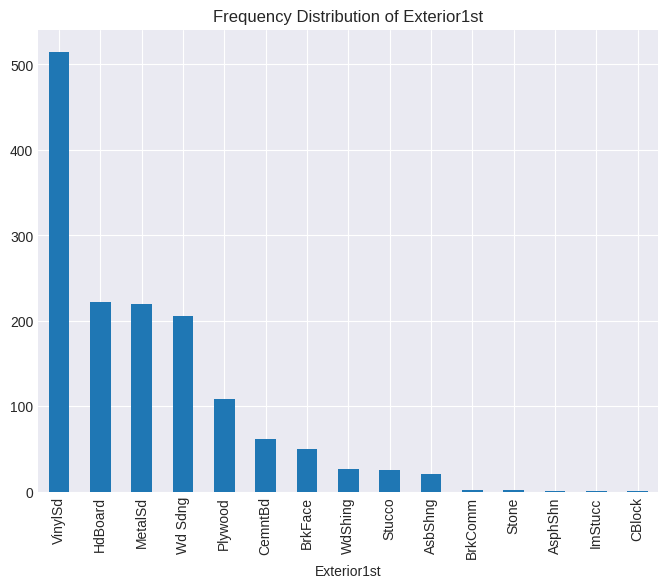

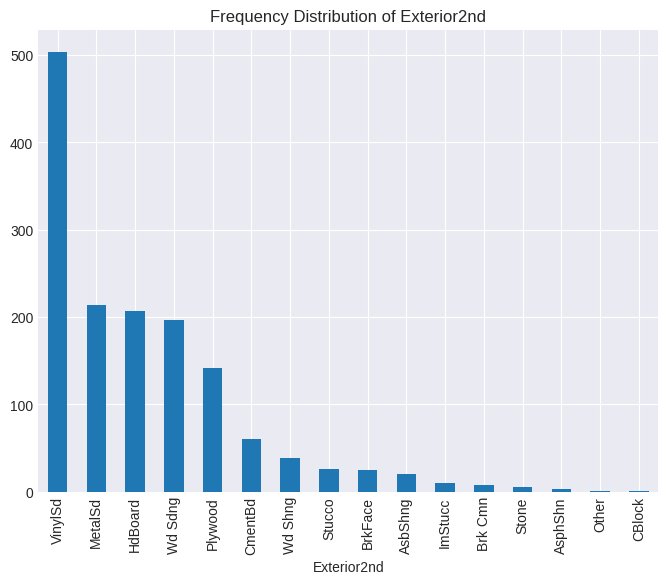

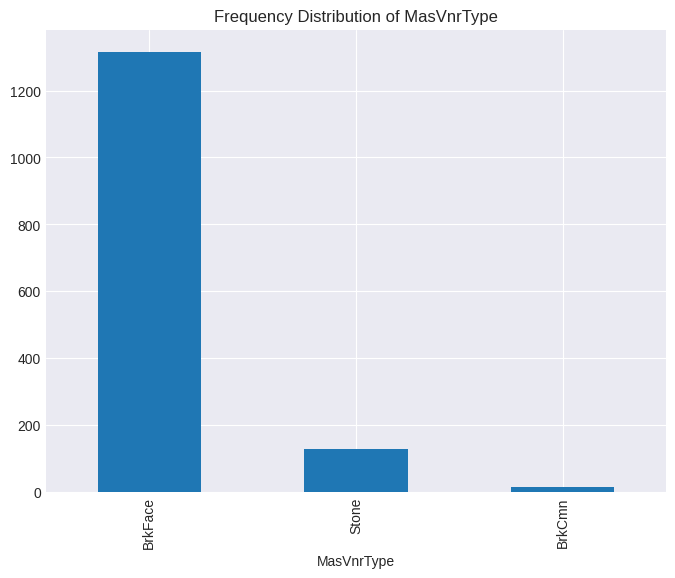

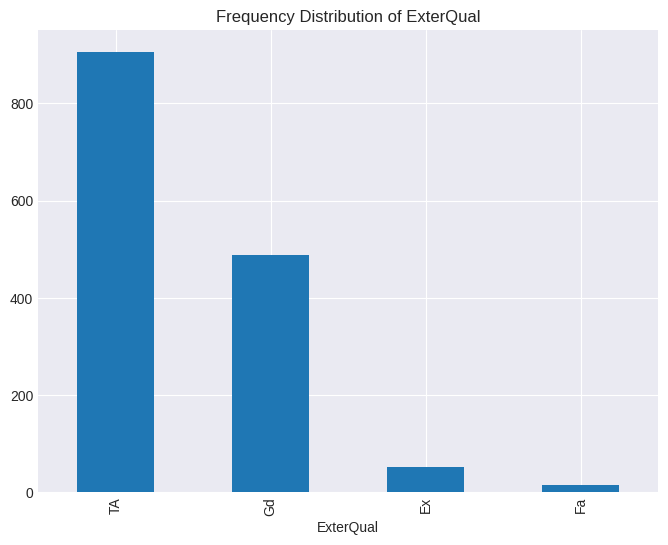

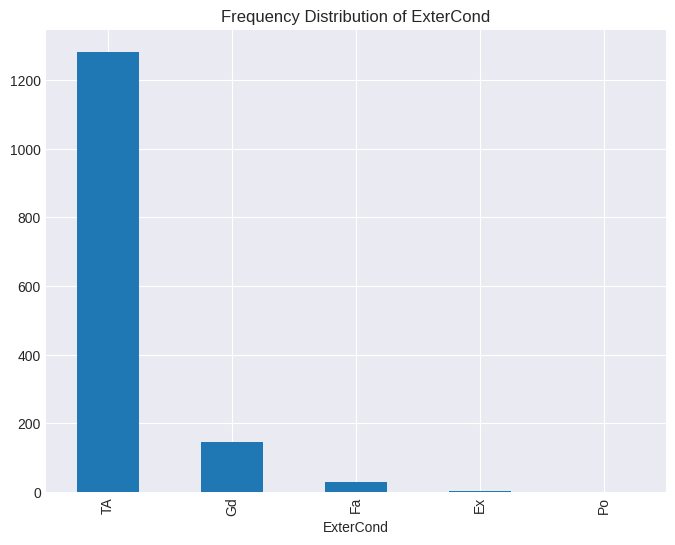

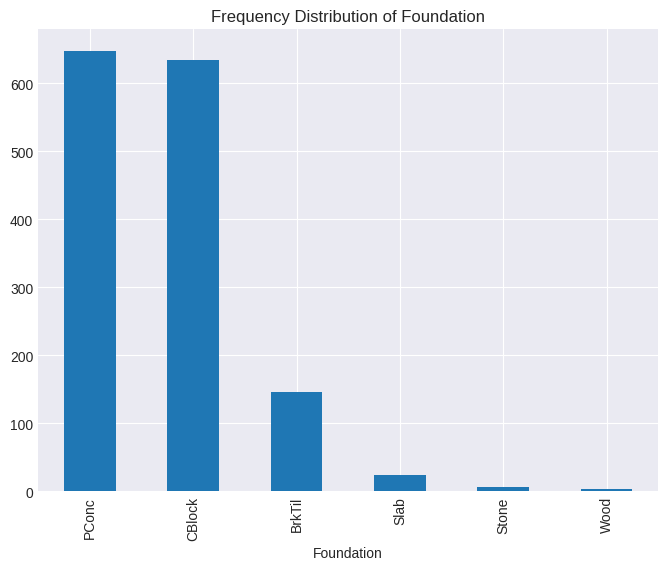

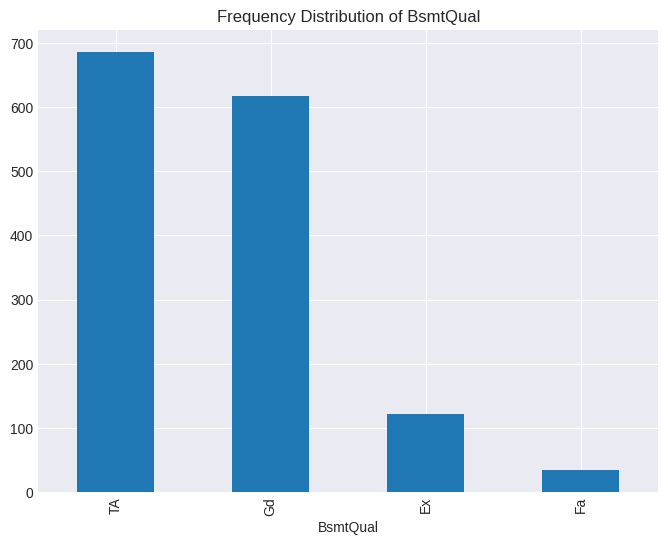

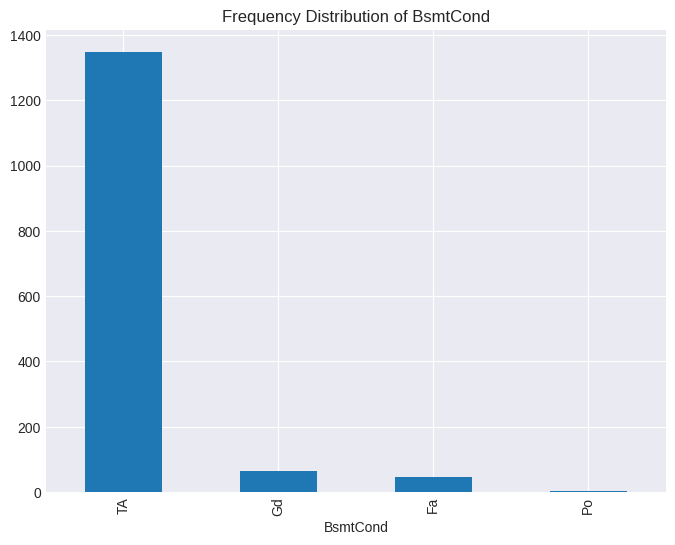

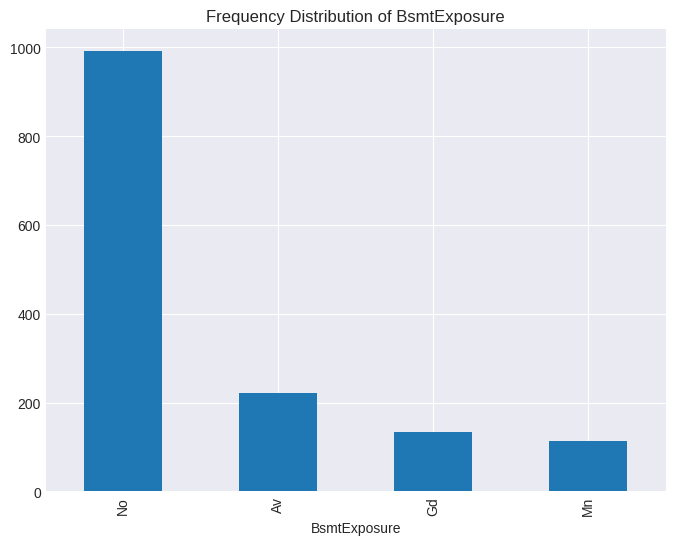

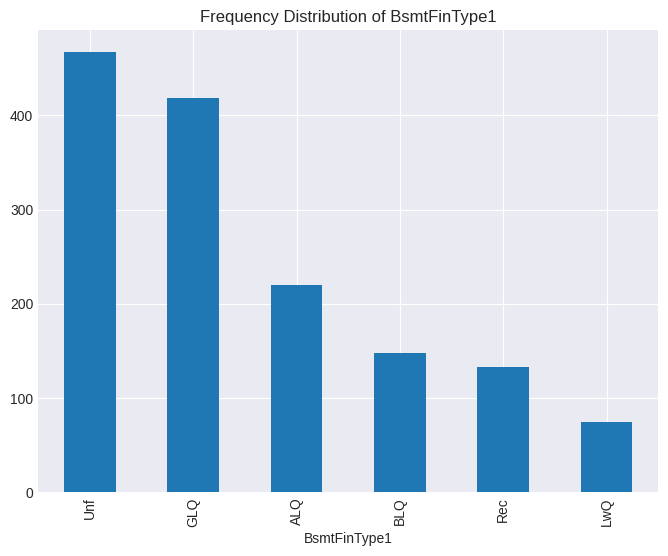

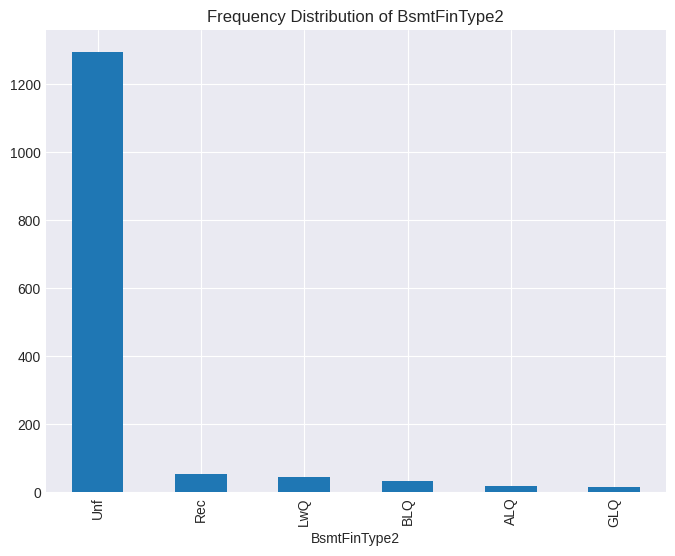

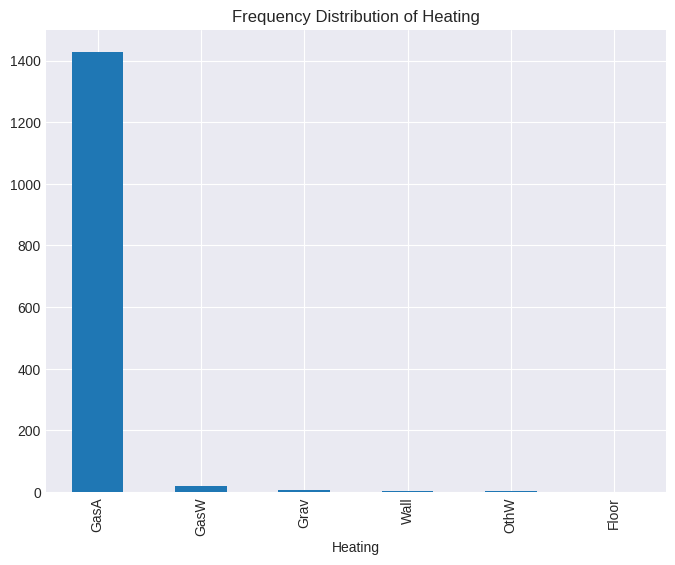

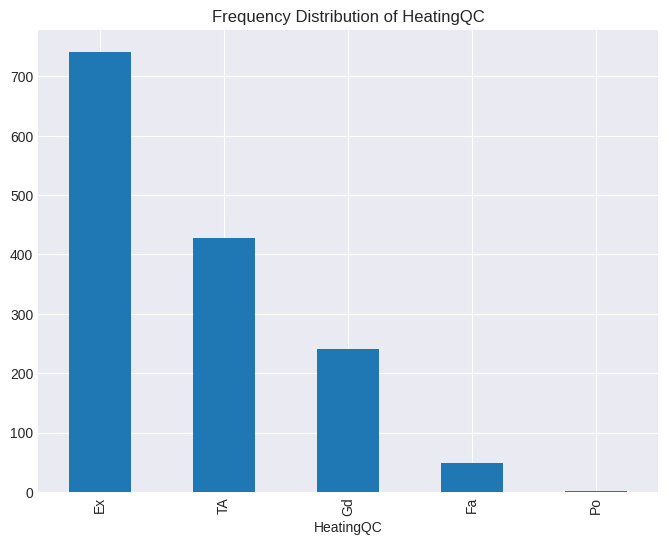

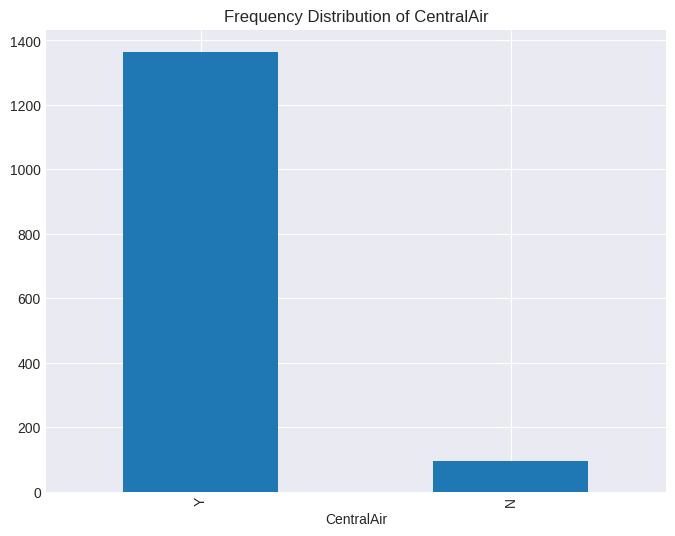

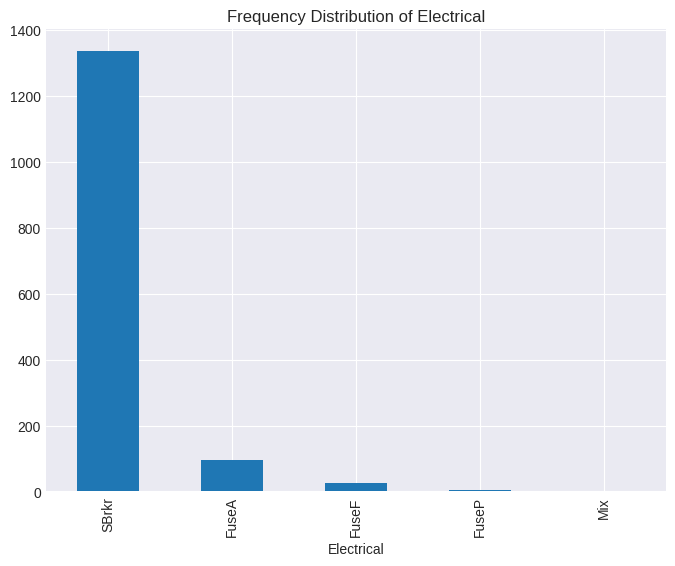

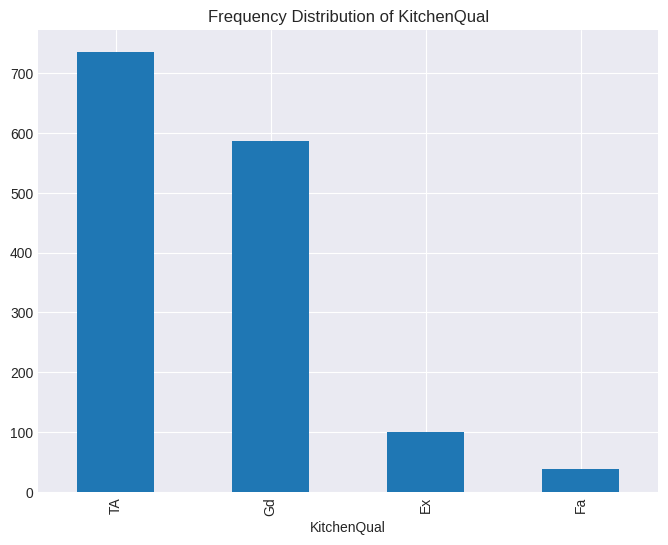

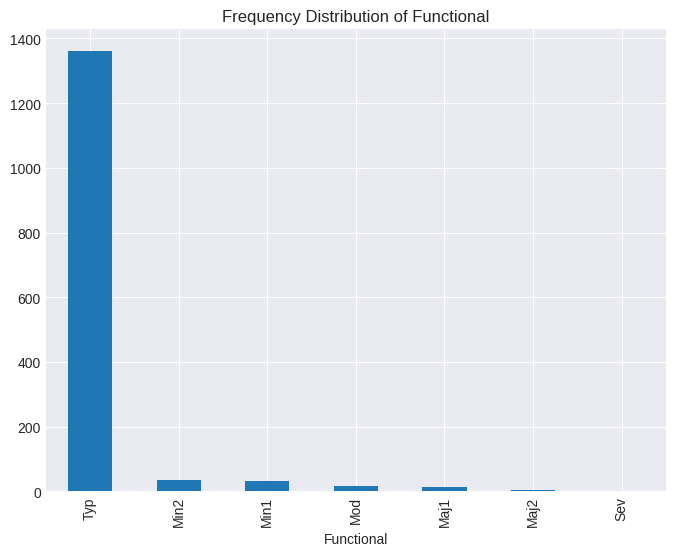

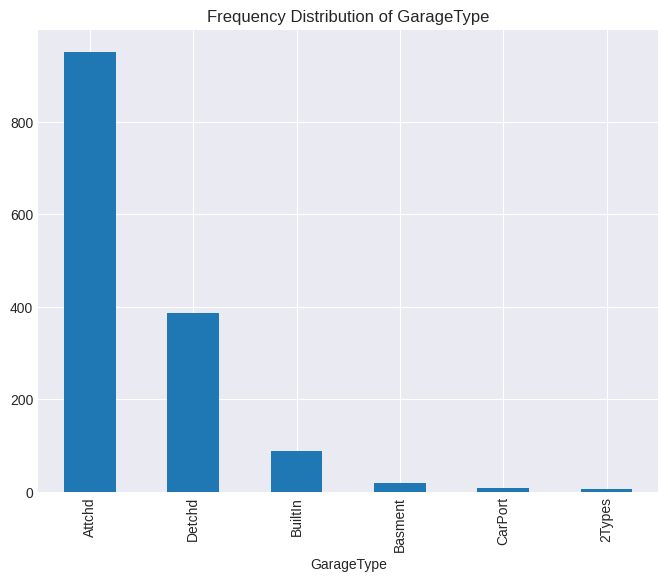

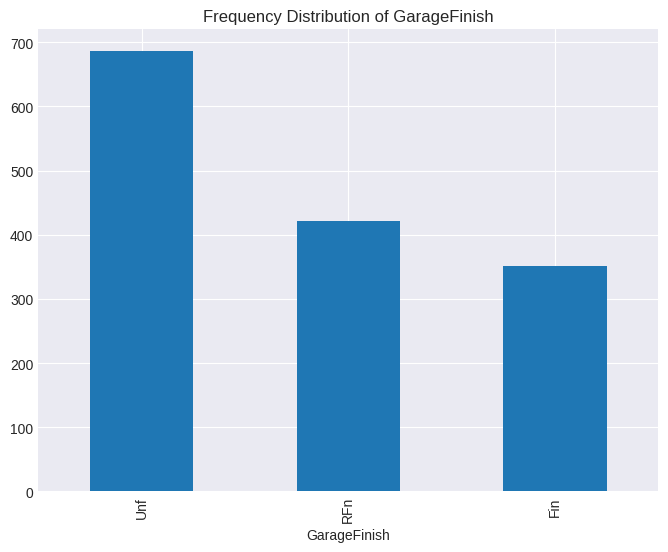

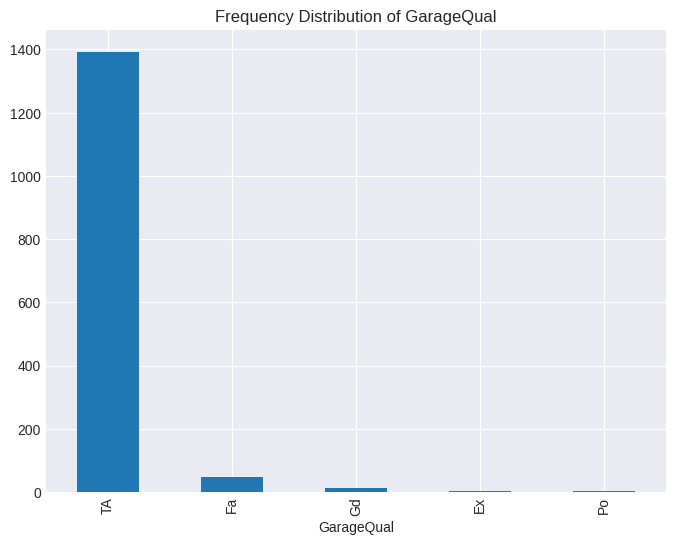

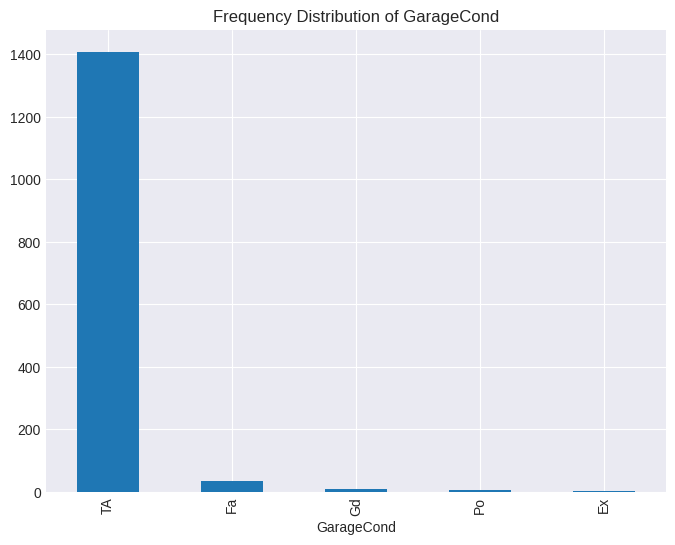

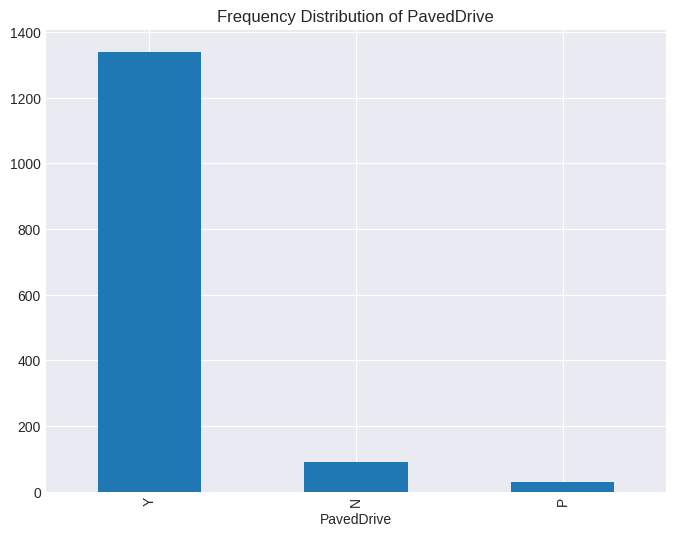

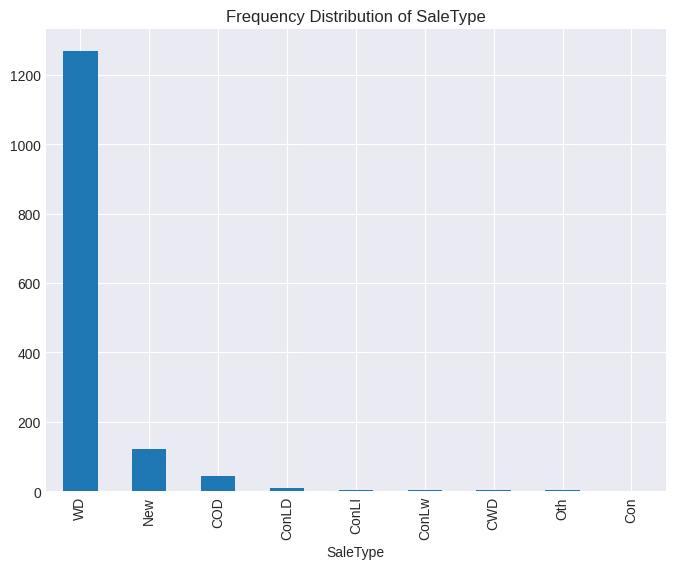

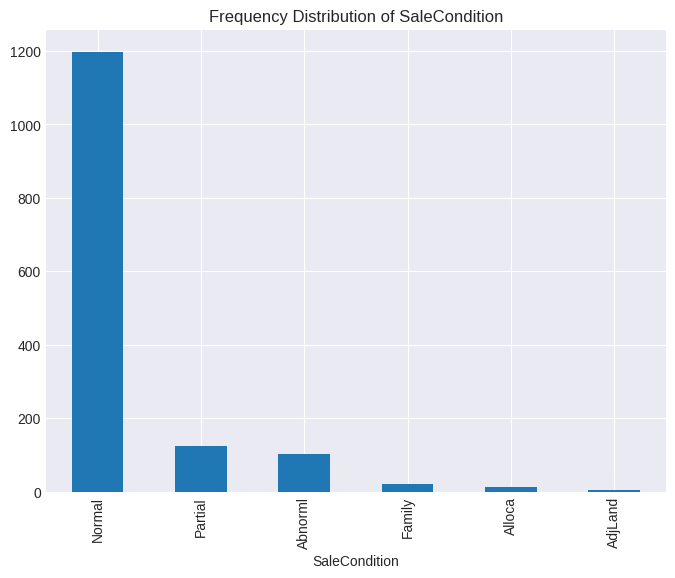

In [29]:
# Checking the Frequency Distribution of the Categorical columns
for column in trainCat.columns:
    plt.figure(figsize=(8, 6))
    trainCat[column].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {column}')
    plt.show()

In [33]:
# Checking the Cardinality of the Categorical features
cardinality = trainCat.nunique()
print(cardinality.sort_values(ascending=False))

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
Foundation        6
GarageType        6
Heating           6
BsmtFinType2      6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
BldgType          5
GarageCond        5
GarageQual        5
Electrical        5
LotConfig         5
HeatingQC         5
ExterCond         5
MSZoning          5
BsmtExposure      4
BsmtCond          4
BsmtQual          4
KitchenQual       4
LandContour       4
ExterQual         4
LotShape          4
LandSlope         3
MasVnrType        3
GarageFinish      3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64


In [40]:
# Doing One Hot encoding
print(trainCat.shape)
trainCat_encoded = pd.get_dummies(trainCat, columns=list(trainCat.columns))
# Convert to numeric
trainCat_encoded = trainCat_encoded.astype(int)
print(trainCat_encoded.shape)
trainCat_encoded.head()

(1460, 38)
(1460, 233)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


TODO-> Try Dimmensional reduction techniques such as PCA OR TSNE

In [35]:
pass

In [20]:
# Splitting the dataset into train & test

X_train, X_test, y_train, y_test = train_test_split(
    train_imputed, train_imputed["SalePrice"], test_size=0.1, random_state=42
)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1314, 75)
y_train shape: (1314,)
X_test shape: (146, 75)
y_test shape: (146,)
